# Homework 4

by Quanzhi (Allen) Bi

## Question 1 Exploratory Data Analysis

From example/input/ load compustat.csv inside compustat.zip without unzip compustat.zip

In [1]:
from zipfile import ZipFile
zip = ZipFile('./compustat.zip','r')
zip.printdir()

File Name                                             Modified             Size
compustat.csv                                  2020-08-07 12:01:14    164867490


In [2]:
import pandas as pd
df = pd.read_csv(zip.open('compustat.csv'))
df.head(5)

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


### 1. Variable names that we are interested in:
   * sic code: four digits integer for company
   * datecqtr: year/ quarter time for the record
   * cusip: compustats identifier for a company
   * chod: shares out of standing (in million)
   * saleq: sales of current quarter (in million)
   * prccq: close price of current quarter (in dollar)

In [3]:
data = df.loc[:,['sic','datacqtr','cusip','cshoq','saleq','prccq']]
data['mktcap'] = data['cshoq'] * data['prccq'] 
data.head(5)

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


### 2. For saleq and market cap, compute the following:
   * Time series mean 
   * Time Series standard deviation
   * Time Series count of missing values
   * Time Series ratio of missing values
   * Aggregate the result in a dataframe

In [4]:
def aggregate_stats(df):
    mean = df.mean()
    std = df.std()
    count = df.count()
    size = len(df)
    nan = size - count
    nan_ratio = nan / size
    return pd.Series([mean, std, nan, nan_ratio], index = ['mean', 'std', 'miss_count', 'miss_rate']).to_frame(name=df.name)

In [5]:
mktcap_stats = aggregate_stats(data['mktcap'])
saleq_stats = aggregate_stats(data['saleq'])
df_stats = pd.concat([mktcap_stats, saleq_stats], axis=1)
df_stats

,mktcap,saleq
mean,2057.473104,445.150664
std,13202.197457,2679.706576
miss_count,468276.000000,269498.000000
miss_rate,0.258530,0.148787


### 3. Answer the following questions:

#### a) Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
   
We can plot the time series.




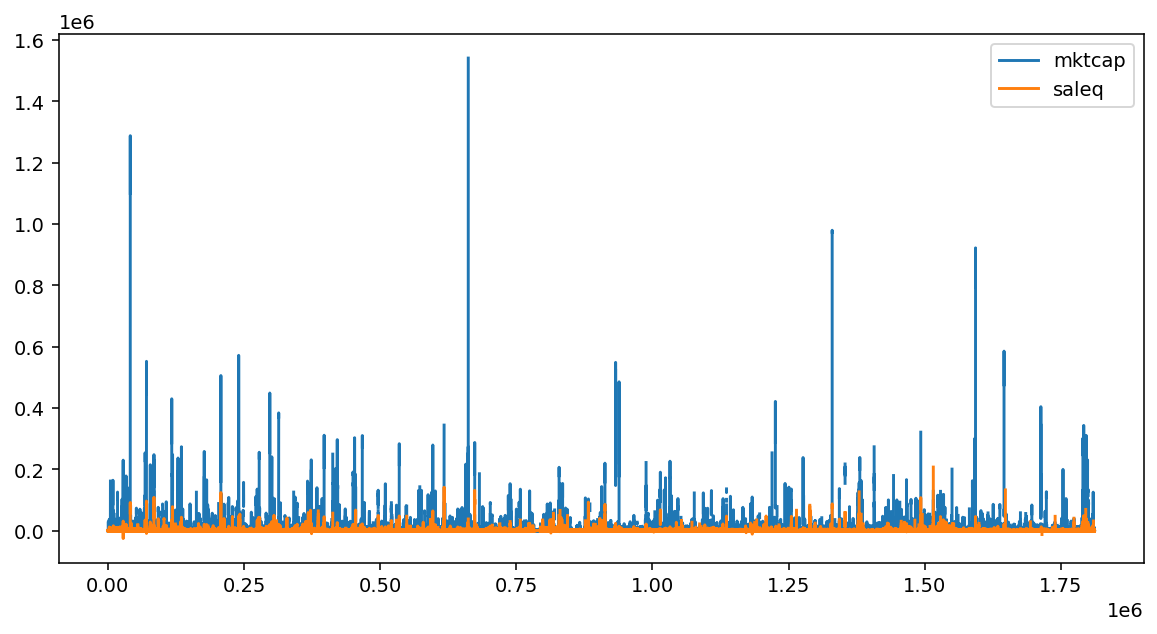

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 140

data[['mktcap','saleq']].plot(figsize=(10,5))

   so we can see that there are some outliers in both dataframe.
   
#### b) Implement some schemes to detect outliers.

We can use boxplot we detect tye outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b5f405c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b5f40cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b5f40470>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b5f52438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b5f527b8>],
 'means': []}

Text(0.5, 1.0, 'Boxplot for market cap')

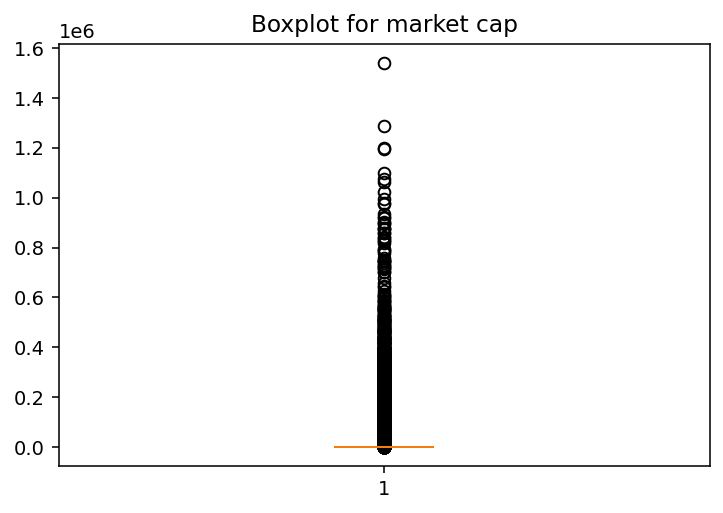

In [7]:
plt.boxplot(data['mktcap'].dropna())
plt.title("Boxplot for market cap")

A lot of outliers...

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3b0396160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3b0396898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3b9c4afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3b0396f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3b039e358>],
 'means': []}

Text(0.5, 1.0, 'Boxplot for saleq')

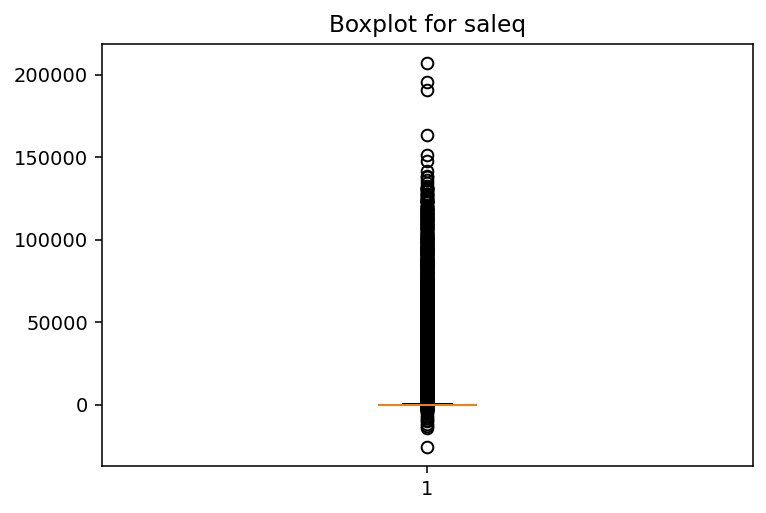

In [8]:
plt.boxplot(data['saleq'].dropna())
plt.title("Boxplot for saleq")

a lot of outliers...we can't even see the box here

#### c) Do you find some outliers? Could you think why? You can do some research using google.

Extreme events occurs much more frequently than we would expect (using normal distribution model, fat tail)

#### d) What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

The standard deviation is larger than the mean of the time series. This tells us the series is extremely volatile, can also be confirmed with the time series plot shown above.

## Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [9]:
data = data.dropna()
data['sic'] = data['sic'].astype('str')
data['sic'] = data['sic'].str[0:2]
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap
18,30,1970Q3,000032102,2.230,10.698,11.750,26.202500
19,30,1970Q4,000032102,2.446,10.919,10.000,24.460000
20,30,1971Q1,000032102,3.507,7.983,9.750,34.193250
21,30,1971Q2,000032102,3.518,9.885,8.250,29.023500
22,30,1971Q3,000032102,3.515,7.975,4.625,16.256875


In [10]:
data['mktcap_sum'] = data.groupby(['sic', 'datacqtr']).mktcap.transform('sum')
data['mktshare'] = data['mktcap'] / data['mktcap_sum'] * 100
data['mktshare_square'] = data['mktshare'] * data['mktshare']
data['HHI'] = data.groupby(['sic', 'datacqtr']).mktshare_square.transform('sum')
data.head(10)

,sic,datacqtr,cusip,cshoq,saleq,prccq,mktcap,mktcap_sum,mktshare,mktshare_square,HHI
18,30,1970Q3,000032102,2.230,10.698,11.750,26.202500,5948.329125,0.440502,0.194042,1849.571608
19,30,1970Q4,000032102,2.446,10.919,10.000,24.460000,8067.256308,0.303201,0.091931,1424.771672
20,30,1971Q1,000032102,3.507,7.983,9.750,34.193250,8344.458335,0.409772,0.167913,1386.952707
21,30,1971Q2,000032102,3.518,9.885,8.250,29.023500,9039.093803,0.321089,0.103098,1296.213826
22,30,1971Q3,000032102,3.515,7.975,4.625,16.256875,8831.406151,0.184080,0.033886,1386.786799
23,30,1971Q4,000032102,2.995,7.872,5.750,17.221250,9313.714730,0.184902,0.034189,1220.841134
24,30,1972Q1,000032102,2.981,8.201,5.625,16.768125,9345.044818,0.179433,0.032196,1216.160986
25,30,1972Q2,000032102,2.956,9.958,6.000,17.736000,9500.571881,0.186683,0.034851,1000.456114
26,30,1972Q3,000032102,2.959,7.911,5.250,15.534750,9011.826991,0.172382,0.029715,1121.073053
27,30,1972Q4,000032102,2.902,8.918,5.125,14.872750,9721.436585,0.152989,0.023406,1102.136381


In [14]:
data['HHI_mean'] = data.groupby('sic').HHI.transform('mean')
df_HHI = data[['sic', 'HHI_mean']]
df_HHI = df_HHI.drop_duplicates()
# remove the industry with only one company (what kind of industry could be?)
df_HHI = df_HHI[df_HHI['HHI_mean'] < 10000]
df_HHI = df_HHI.sort_values(ascending=False, by='HHI_mean', ignore_index=True)
df_HHI.head(4)

,sic,HHI_mean
0,81,9134.847753
1,90,8811.546856
2,84,8736.967212
3,41,6736.393268


Text(0.5, 0.98, 'Top 4 industries with the highest average HHI index')

Text(0.5, 1.0, 'Industry Code : 81')

Text(0.5, 1.0, 'Industry Code : 90')

Text(0.5, 1.0, 'Industry Code : 84')

Text(0.5, 1.0, 'Industry Code : 41')

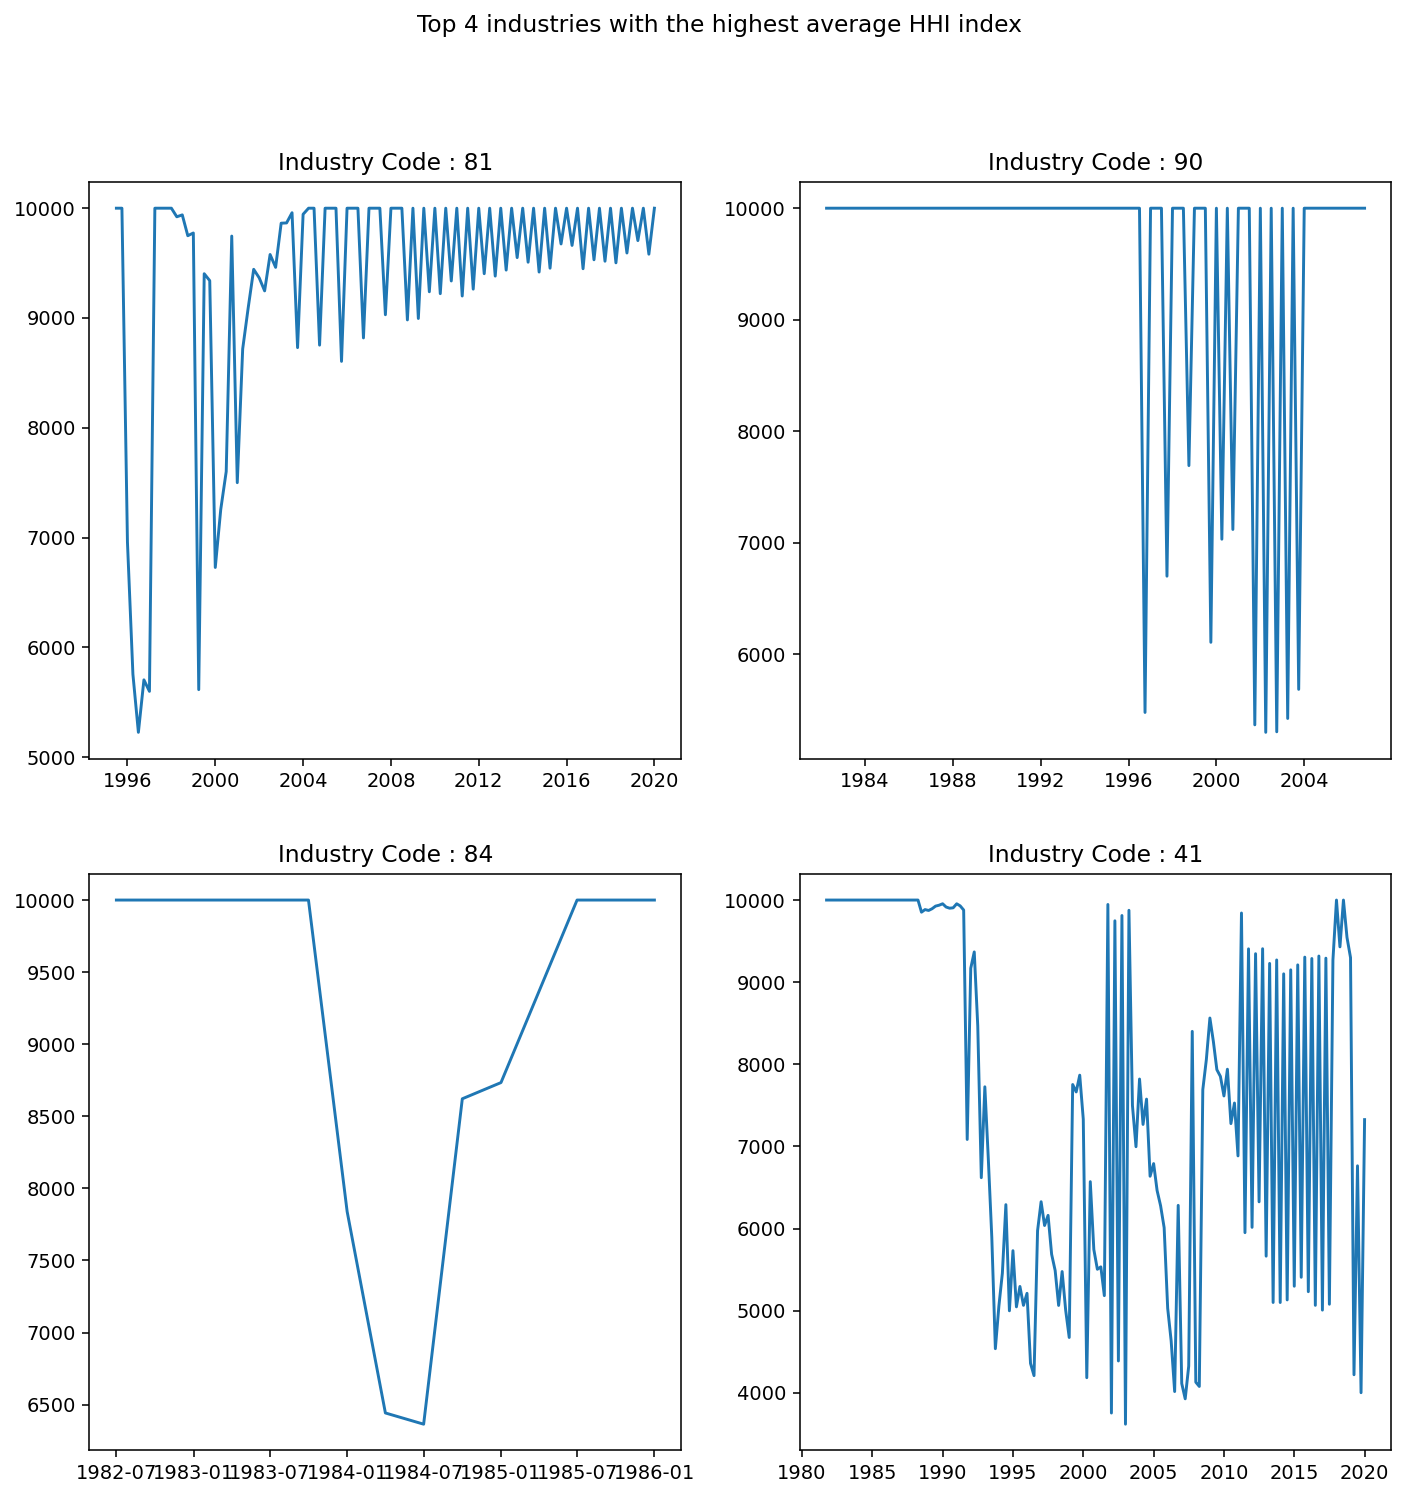

In [12]:
top4sic = [df_HHI['sic'][i] for i in range(4)]
position = [(0,0),(0,1),(1,0),(1,1)]
fig = plt.figure(figsize=(12,12)) 
axes = fig.subplots(2,2)
fig.suptitle('Top 4 industries with the highest average HHI index')
for i, sic in enumerate(top4sic):
    x = position[i][0]
    y = position[i][1]
    HHI = data[data['sic']==sic]
    HHI = HHI.drop_duplicates()
    HHI['datacqtr'] = pd.to_datetime(HHI['datacqtr'].str[:4] + HHI['datacqtr'].str[4:6])
    HHI = HHI.sort_values(by='datacqtr', ignore_index=True)
    axes[x, y].plot(HHI['datacqtr'], HHI['HHI'])
    axes[x, y].set_title(label='Industry Code : '+sic)